## EAS 503 Homework 3 Submission
Name - Sai Kiran Putta

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
chicago_data = pd.read_csv("chicago_crime_data.csv")
primary_type_id = pd.read_csv("primary_type_id.csv")

combined_data = pd.merge(chicago_data, primary_type_id, on = "Primary Type ID")
combined_data = combined_data.sort(['Crime_ID'])
del (chicago_data, primary_type_id)

combined_data["Date_month"] = pd.to_datetime(combined_data['Date']).dt.strftime("%Y-%m")
Date_index = pd.DatetimeIndex(list(combined_data['Date_month']))
combined_data = combined_data.set_index(Date_index)

Crime_Frequency = combined_data['Primary Type'].value_counts().to_frame().reset_index()
Crime_Frequency.columns = ['Primary Type', "Count"]
Crime_Frequency = Crime_Frequency.sort(['Count'], ascending = False)
High_Frequency_Crime = Crime_Frequency[Crime_Frequency['Count'] > 10000]



/home/saikiran/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/saikiran/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


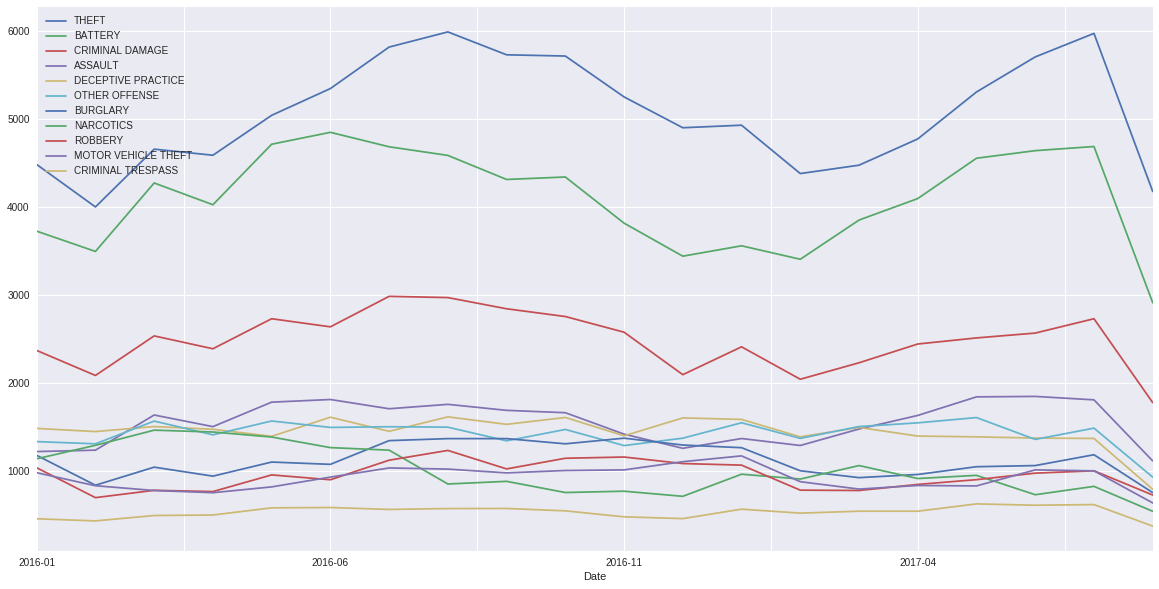

In [3]:
filtered_data = combined_data['2016-01':'2017-12']
final_result = pd.DataFrame()
for index, value in enumerate(High_Frequency_Crime['Primary Type']):
    sub_filtered_data = filtered_data[filtered_data['Primary Type'] == value]
    result = sub_filtered_data.groupby(['Date_month']).size().to_frame().reset_index()
    result.columns = ['Date', 'count']
    if index == 0: final_result['Date'] = result['Date'] 
    final_result[value] = result['count']
final_result.plot(x = 'Date', figsize = (20,10))


In [4]:
print(sum(filtered_data['Latitude'].isnull()))
print(sum(filtered_data['Longitude'].isnull()))

#There are some values which are null. Hence sorting the filtered_data by date and using fill function to impute
impute_cols = ['Latitude', 'Longitude']
filtered_data = filtered_data.sort(['Date'], ascending = True)
filtered_data[impute_cols] = filtered_data[impute_cols].ffill()

#checking again. 
print(sum(filtered_data['Latitude'].isnull()))
print(sum(filtered_data['Longitude'].isnull()))

22902
22902


/home/saikiran/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


6
6


In [5]:
#There seem to be continuous null values which are not being imputed. 
#Let's try backfill and print the number of null values then. 
filtered_data[impute_cols] = filtered_data[impute_cols].bfill()

#checking again. 
print(sum(filtered_data['Latitude'].isnull()))
print(sum(filtered_data['Longitude'].isnull()))

0
0


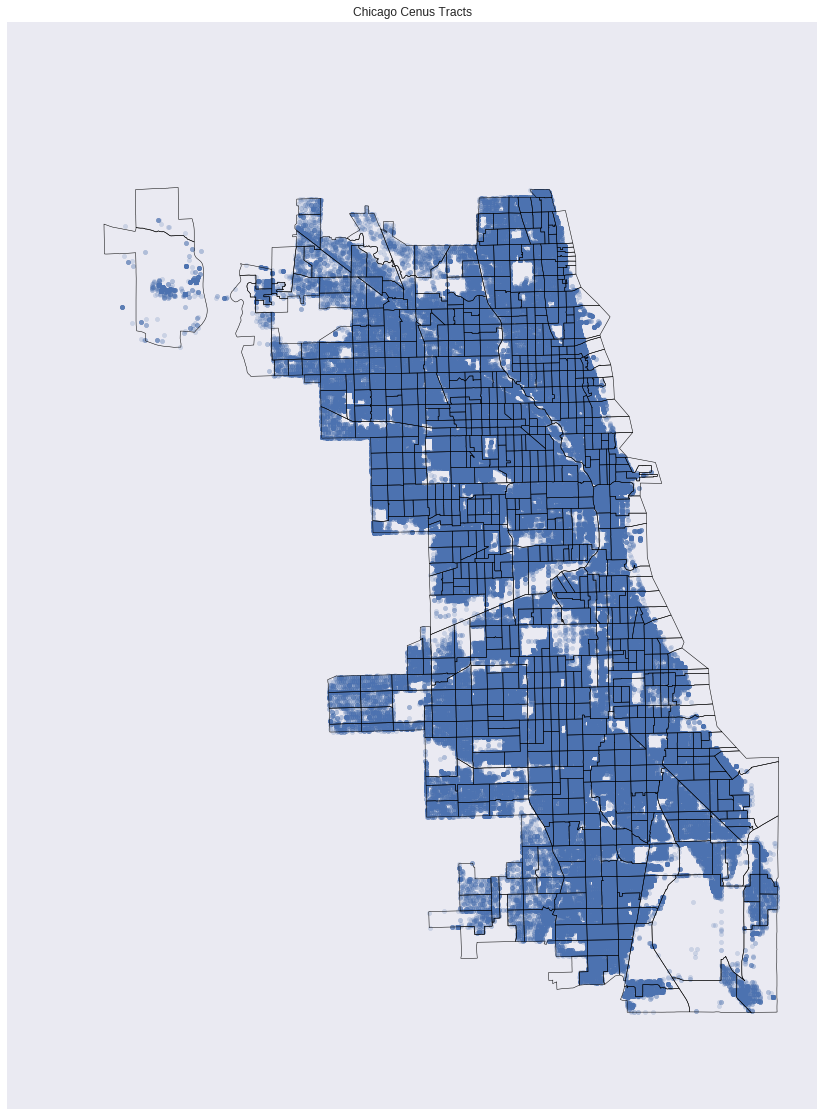

In [6]:
fig = plt.figure(figsize=[25,20])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = list(filtered_data['Longitude'].values)
lats = list(filtered_data['Latitude'].values)
x,y = m(lons,lats)
plt.scatter(x,y,alpha = 0.2,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()

### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

In [7]:
#Enter your solution here
import numpy as np
def get_A(N):
    A = list(np.random.rand(N, N))
    return(A)

def get_B(N):
    B = list(np.random.rand(N))
    return(B)

In [8]:
def mergeSort(data_list):
    if len(data_list)>1:
        mid = len(data_list)//2
        lefthalf = data_list[:mid]
        righthalf = data_list[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i, j, k = 0, 0, 0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                data_list[k]=lefthalf[i]
                i=i+1
            else:
                data_list[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            data_list[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            data_list[k]=righthalf[j]
            j=j+1
            k=k+1

In [9]:
import time
import sys


mergesort_time = []
np_time = []
for i in list(range(1000, 25000, 1000)):
    print(i)
    b = get_B(i)
    
    #np mergesort benchmark.
    start_time = time.time()
    b = np.sort(b, kind = "mergesort")
    end_time = time.time()
    est_time = end_time - start_time
    np_time.append(est_time)
    #print("np-mergesort: ", str(est_time))
    
    #implemented mergesort benchmark. 
    start_time = time.time()
    mergeSort(b)
    end_time = time.time()
    est_time = end_time - start_time
    mergesort_time.append(est_time)
    del b

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


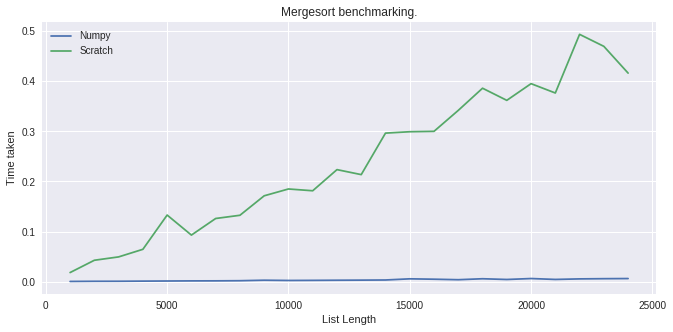

In [10]:
plt.figure(figsize = (11,5)) 
list_size = list(range(1000, 25000, 1000))
plt.title("Mergesort benchmarking.")
plt.xlabel("List Length")
plt.ylabel("Time taken")
plt.plot(list_size, np_time, label = "Numpy")
plt.plot(list_size, mergesort_time, label = "Scratch")
plt.legend()

Observations: Like it can be observed in the graph, the numpy implementation is superior to a standard sorting 
algorithm. 

The overhead of maintaining additional information in regular python's native list causes to take more time for the
same sorting implementation. 

In [11]:
def Determinant(A, len_A):
    if(len_A == 1):
        return(A[0])
    elif(len_A == 2):
        result = (A[0][0] * A[1][1]) - (A[0][1] * A[1][0])
        return(result)
    else:
        a = 0
        for i in list(range(0,len_A)):
            row_ids = list(range(1, len_A))
            col_ids = list(set(list(range(0,len_A))) - set([i]))
            submatrix = np.array(A)[np.ix_(row_ids, col_ids)]
            #print(A[0][i], submatrix)
            a += ((pow(-1, i) * A[0][i]) * Determinant(np.array(submatrix), len_A-1))
        return(a)
    

In [12]:
import sys
import time
sys.setrecursionlimit(99999999)
det_time = []
np_time = []
for i in list(range(2,12,2)):
    a = get_A(i)
    
    #np determinent benchmark.
    start_time = time.time()
    det_np = np.linalg.det(a)
    end_time = time.time()
    est_time = end_time - start_time
    np_time.append(est_time)
    
    #implemented determinent benchmark. 
    start_time = time.time()
    det_manual = Determinant(a, len(a))
    end_time = time.time()
    est_time = end_time - start_time
    det_time.append(est_time)
    print(i)
    del a

2
4
6
8
10


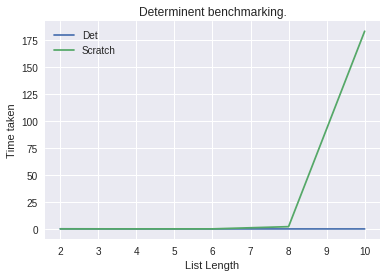

In [14]:
list_size = list(range(2,12,2))
plt.title("Determinent benchmarking.")
plt.xlabel("List Length")
plt.ylabel("Time taken")
plt.plot(list_size, np_time, label = "Det")
plt.plot(list_size, det_time, label = "Scratch")
plt.legend()

Observations: The scratch determinant calculation is taking much more time than numpy's native implementation. 
As the dimensions of the matrix exceed 10 the time taken for computation is too much. While the numpy's 
implementation remains the same. 
Hence it is always advisable to use numpy's implementation for these matrix computations. 

In [16]:
def Matrix_multiply(A):
    result = np.zeros((len(A), len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            for k in range(len(A)):
                result[i][j] += A[i][k] * A[k][j]
    return(result)

np_list = []
subroutine_list = []
for i in list(range(10, 300, 10)):
    A = get_A(i)
    #np subroutine. 
    start_time = time.time()
    result = np.matmul(A, A)
    end_time = time.time()
    np_list.append(end_time - start_time)
    
    #implemented subroutine. 
    start_time = time.time()
    result = Matrix_multiply(A)
    end_time = time.time()
    subroutine_list.append(end_time - start_time)
    
    print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


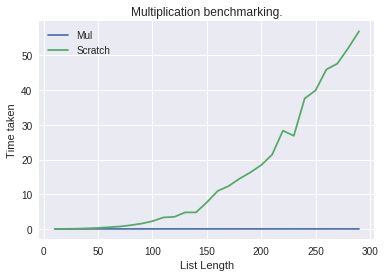

In [17]:
list_size = list(range(10,300,10))
plt.title("Multiplication benchmarking.")
plt.xlabel("List Length")
plt.ylabel("Time taken")
plt.plot(list_size, np_list, label = "Mul")
plt.plot(list_size, subroutine_list, label = "Scratch")
plt.legend()

Observations: The scratch matrix multiplication calculation is taking much more time than numpy's native 
implementation. Hence it is always advisable to use numpy's implementation for these matrix computations.